In [2]:
import sys
import os
import glob
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx 
%matplotlib inline

### Load Main DB (raw data)

In [3]:
col = ["paper_id", "date", "name",'fname', 'lname', "affiliationIds"]
df = pd.read_csv('../../01 Data/03 Consolidated/authors_write_each_line_v9.csv', names=col)

In [4]:
df

,paper_id,date,name,fname,lname,affiliationIds
0,10.1103/PhysRevApplied.9.039901,2018-03-06,Tomoyuki Sasaki,Tomoyuki,Sasaki,[]
1,10.1103/PhysRevApplied.9.039901,2018-03-06,Yuichiro Ando,Yuichiro,Ando,[]
2,10.1103/PhysRevApplied.9.039901,2018-03-06,Makoto Kameno,Makoto,Kameno,[]
3,10.1103/PhysRevApplied.9.039901,2018-03-06,Takayuki Tahara,Takayuki,Tahara,[]
4,10.1103/PhysRevApplied.9.039901,2018-03-06,Hayato Koike,Hayato,Koike,[]
...,...,...,...,...,...,...
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1


### Read Gender-Name Mapping

In [5]:
# Converted: Removed Array Brackets from original
with open('../../01 Data/02 Genderize/99 Final/converted_genderize_results.txt', 'r') as f:
    for line in f:
        fields = line.split('}, {')

In [6]:
# Manually add back braces to later convert to json/eval
new = []
for val in fields:
    new.append(str('{') + val + str('}'))
    
# Remove extra brackets at the start and the end
new[0] = new[0][1:]
new[-1] = new[-1][:-1]

In [7]:
gen_dict = {}

for val in new:
    
    # Only keep those names that actually have gender associated with them
    if eval(val)['gender'] in ('male', 'female'):
        gen_dict[eval(val)['name']] = eval(val)['gender']

gen_dict

{'david': 'male',
 'marina': 'female',
 'robert': 'male',
 'warren': 'male',
 'richard': 'male',
 'liliana': 'female',
 'clifford': 'male',
 'georgii': 'male',
 'jerry': 'male',
 'william': 'male',
 'carlos': 'male',
 'lior': 'male',
 'daniel': 'male',
 'paul': 'male',
 'jolien': 'female',
 'stephen': 'male',
 'deog': 'male',
 'christopher': 'male',
 'stanley': 'male',
 'thomas': 'male',
 'gary': 'male',
 'chong': 'male',
 'bing': 'male',
 'jin': 'male',
 'chen': 'male',
 'adam': 'male',
 'john': 'male',
 'mark': 'male',
 'martin': 'male',
 'fred': 'male',
 'javier': 'male',
 'markus': 'male',
 'shin': 'male',
 'ariel': 'male',
 'yogendra': 'male',
 'jae': 'male',
 'yeong': 'male',
 'igor': 'male',
 'ron': 'male',
 'dennis': 'male',
 'peter': 'male',
 'charles': 'male',
 'francine': 'female',
 'michael': 'male',
 'pedro': 'male',
 'fintan': 'male',
 'claudio': 'male',
 'gregory': 'male',
 'eric': 'male',
 'douglas': 'male',
 'simon': 'male',
 'theocharis': 'male',
 'steven': 'male',
 '

### Map Gneder against main data

***IMPORTANT: The existing fname in data is NOT GOOD! Conatins middle name as well sometimes. MAKE NEW FNAME***

In [8]:
df['new_fname'] = df.name.apply(lambda x: x.split(' ')[0])

In [9]:
df

,paper_id,date,name,fname,lname,affiliationIds,new_fname
0,10.1103/PhysRevApplied.9.039901,2018-03-06,Tomoyuki Sasaki,Tomoyuki,Sasaki,[],Tomoyuki
1,10.1103/PhysRevApplied.9.039901,2018-03-06,Yuichiro Ando,Yuichiro,Ando,[],Yuichiro
2,10.1103/PhysRevApplied.9.039901,2018-03-06,Makoto Kameno,Makoto,Kameno,[],Makoto
3,10.1103/PhysRevApplied.9.039901,2018-03-06,Takayuki Tahara,Takayuki,Tahara,[],Takayuki
4,10.1103/PhysRevApplied.9.039901,2018-03-06,Hayato Koike,Hayato,Koike,[],Hayato
...,...,...,...,...,...,...,...
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,Mikhail
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1,A.
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1,F.
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1,A.


***Example of data which would have gooten unmapped to gender, if no new fname had been made***

In [10]:
df[df.fname != df.new_fname]

,paper_id,date,name,fname,lname,affiliationIds,new_fname
14,10.1103/PhysRevApplied.9.029901,2018-02-15,Michael A. Carpenter,Michael A.,Carpenter,[],Michael
62,10.1103/PhysRevApplied.9.014013,2018-01-12,Ali Asghar Eftekhar,Ali Asghar,Eftekhar,a1,Ali
67,10.1103/PhysRevApplied.9.061001,2018-06-19,Vitalyi E. Gusev,Vitalyi E.,Gusev,a1,Vitalyi
106,10.1103/PhysRevApplied.9.034020,2018-03-23,Roderick C. I. MacKenzie,Roderick C. I.,MacKenzie,a2,Roderick
184,10.1103/PhysRevApplied.9.014025,2018-01-24,Samuel A. Miller,Samuel A.,Miller,a1,Samuel
...,...,...,...,...,...,...,...
2503822,10.1103/PhysRevSTAB.14.084403,2011-08-29,Bruce E. Carlsten,Bruce E.,Carlsten,a1,Bruce
2503823,10.1103/PhysRevSTAB.14.084403,2011-08-29,Kip A. Bishofberger,Kip A.,Bishofberger,a1,Kip
2503824,10.1103/PhysRevSTAB.14.084403,2011-08-29,Steven J. Russell,Steven J.,Russell,a1,Steven
2503825,10.1103/PhysRevSTAB.14.084403,2011-08-29,Nikolai A. Yampolsky,Nikolai A.,Yampolsky,a1,Nikolai


In [11]:
len(set(df.fname))

77969

In [12]:
len(set(df.new_fname))

44752

***Map Genders***

In [13]:
# Normalize fname for matching
df['norm_fname'] = df['new_fname'].apply(lambda x: x.lower().replace('.', '') if x==x else np.nan)

In [14]:
df['gender'] = df['norm_fname'].apply(lambda x: gen_dict[x] if x==x and x in gen_dict else np.nan)

In [15]:
df

,paper_id,date,name,fname,lname,affiliationIds,new_fname,norm_fname,gender
0,10.1103/PhysRevApplied.9.039901,2018-03-06,Tomoyuki Sasaki,Tomoyuki,Sasaki,[],Tomoyuki,tomoyuki,NaN
1,10.1103/PhysRevApplied.9.039901,2018-03-06,Yuichiro Ando,Yuichiro,Ando,[],Yuichiro,yuichiro,NaN
2,10.1103/PhysRevApplied.9.039901,2018-03-06,Makoto Kameno,Makoto,Kameno,[],Makoto,makoto,male
3,10.1103/PhysRevApplied.9.039901,2018-03-06,Takayuki Tahara,Takayuki,Tahara,[],Takayuki,takayuki,male
4,10.1103/PhysRevApplied.9.039901,2018-03-06,Hayato Koike,Hayato,Koike,[],Hayato,hayato,NaN
...,...,...,...,...,...,...,...,...,...
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,Mikhail,mikhail,male
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1,A.,a,NaN
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1,F.,f,NaN
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1,A.,a,NaN


In [17]:
print("# Total Authors: {:,}".format(len(df.gender)))
print("# Authors w/ Gender info: {:,}".format(df.gender.count()))
print("\n% of Authors w/ Gender info: {0:0.2f}%".format(100*df.gender.count()/df.shape[0]))

# Total Authors: 2,503,843
# Authors w/ Gender info: 675,700

% of Authors w/ Gender info: 26.99%


% Males: 90.43%
% Females: 9.57%


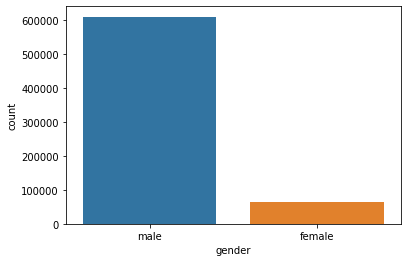

In [18]:
print("% Males: {0:0.2f}%".format(100*len(df[df['gender'] =='male'])/df.gender.count()))
print("% Females: {0:0.2f}%".format(100*len(df[df['gender'] =='female'])/df.gender.count()))

sns.countplot(df.gender)

### Quick Analyses before Writing Data

In [19]:
# Change format to datetime
df['date'] = df['date'].astype('datetime64[ns]')
df['year'] = pd.DatetimeIndex(df['date']).year

In [20]:
df

,paper_id,date,name,fname,lname,affiliationIds,new_fname,norm_fname,gender,year
0,10.1103/PhysRevApplied.9.039901,2018-03-06,Tomoyuki Sasaki,Tomoyuki,Sasaki,[],Tomoyuki,tomoyuki,NaN,2018
1,10.1103/PhysRevApplied.9.039901,2018-03-06,Yuichiro Ando,Yuichiro,Ando,[],Yuichiro,yuichiro,NaN,2018
2,10.1103/PhysRevApplied.9.039901,2018-03-06,Makoto Kameno,Makoto,Kameno,[],Makoto,makoto,male,2018
3,10.1103/PhysRevApplied.9.039901,2018-03-06,Takayuki Tahara,Takayuki,Tahara,[],Takayuki,takayuki,male,2018
4,10.1103/PhysRevApplied.9.039901,2018-03-06,Hayato Koike,Hayato,Koike,[],Hayato,hayato,NaN,2018
...,...,...,...,...,...,...,...,...,...,...
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,Mikhail,mikhail,male,2011
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1,A.,a,NaN,2011
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1,F.,f,NaN,2011
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1,A.,a,NaN,2011


In [21]:
df_auth = df.groupby(['name','gender'],as_index=False).agg({'paper_id':'count'})

In [22]:
df_auth

,name,gender,paper_id
0,A.A. Aczel,male,2
1,A.A. Aligia,male,1
2,A.A. Hasan,male,1
3,A.A. Ioannides,male,2
4,A.A. Korneev,male,2
...,...,...,...
142699,the TEXTOR team,male,18
142700,the TFTR Operating Team,male,1
142701,the TJ-II Team,male,7
142702,the Tore Supra Team,male,1


In [23]:
df_auth.gender.value_counts()

male      125072
female     17632
Name: gender, dtype: int64

In [26]:
print('% of Female Data: {0:0.1%}'.format(df_auth[df_auth.gender=='female'].shape[0]/df_auth.shape[0]))

% of Female Data: 12.4%


In [32]:
print('Female: Avg Lifetime Publications: {0:0.0f} papers'.format(np.mean(df_auth[df_auth.gender=='female']['paper_id'])))
print('Male: Avg Lifetime Publications: {0:0.0f} papers'.format(np.mean(df_auth[df_auth.gender=='male']['paper_id'])))

Female: Avg Lifetime Publications: 4 papers
Male: Avg Lifetime Publications: 5 papers


### Write Data to File

In [33]:
df.to_csv('../../01 Data/03 Consolidated/authors_with_gender_v99.csv', index=False)